In [ ]:
import pandas as pd
fake=pd.read_csv('fake.csv')
true=pd.read_csv('true.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.shape

(23481, 4)

In [ ]:
#here we are checking if there is null value or not
true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
# Use the the first 6000 data of true and fake dataset for building the model.
frames = [true.loc[:6000][:], fake.loc[:6000][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(12002, 5)

In [ ]:
X = df. drop('label', axis=1)
y = df['label']

In [ ]:
df = df.dropna()
df2 = df.copy()

In [ ]:
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Data preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# TFidf Vectorizer (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model building - Passive Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


Confusion matrix, without normalization


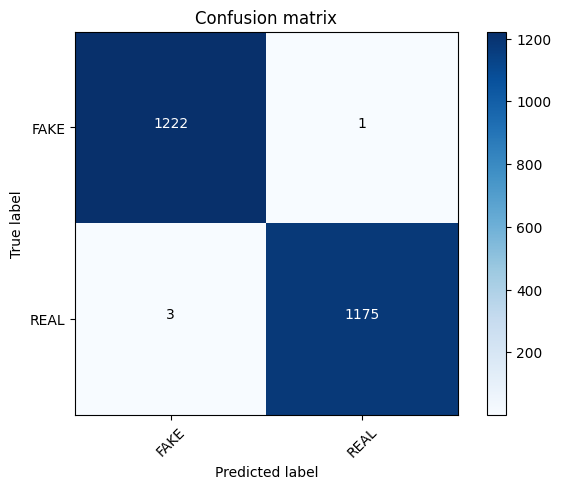

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Validate unseen data

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][11479])
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'hey mainstream media go take break manufactur news trump connect russian actual report billion us taxpay dollar obama gave leftist organ via place depart justic tactic union leader use forc union member contribut due use due fund democrat candid leftist radic caus mani union member agre obama administr funnel billion dollar activist organ depart justic slush fund scheme accord congression investig clear partisan polit play role illicit action made rep john ratcliff r texa told fox news doj last place occur find spearhead hous judiciari committe point process shroud secreci wherebi moni distribut labyrinth nonprofit organ involv grass root activ fox newswatch report obama administr funnel billion liber group doj slush fund pic twitter com jzaml n fox friend foxandfriend march'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
classifier.predict(val)

array([0])

ave model and vectorizer

In [ ]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

Load model and vectorizer to predict the previous datapoint

In [ ]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)

if test_pred == 1:
    print("Fake News!")
else:
    print("Real News")

Real News


SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 99.88%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1223
           1       1.00      1.00      1.00      1178

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

Confusion Matrix:
[[1223    0]
 [   3 1175]]
